[參考資料](https://kknews.cc/zh-tw/news/brzmvj.html)

1.參考該資料 製作ppt講解Random Forest原理

包含: 和DTREE的差異

如何選取feature

投票機制

2. 使用sklearn dataset 中的 wine 製作lab 

要點包含:

    markdown程式
    
    使用DTREE預測 與RF做比較
    
    調設5個參數求出RF的最佳解 並解釋與其他4個相比 為何該參數最好

# Random Forest 原理概念實作相關連結:

* [隨機森林算法及原理](https://kknews.cc/news/q5a6xpr.html)
* [隨機森林-決策樹的投票制](https://kknews.cc/news/e3x34n4.html)
* [Python學習筆記#15：機器學習之決策樹、隨機森林實作篇
](https://medium.com/@search.psop/python%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-15-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E4%B9%8B%E6%B1%BA%E7%AD%96%E6%A8%B9-%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97%E5%AF%A6%E4%BD%9C%E7%AF%87-f05be795a5ce)
* [集成學習（Random Forest）——實踐 RF的分類類是RandomForestClassifier，回歸類是RandomForestRegressor](https://www.itread01.com/content/1521194172.html)
* [機器學習：交叉驗證！](https://ithelp.ithome.com.tw/articles/10197461)

# 1.導入資料,觀察資料,檢視是否有缺失值

In [24]:
from sklearn import datasets
import pandas as pd

In [25]:
wine= datasets.load_wine()
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [26]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [27]:
# print(wine['data'])
# print(wine['target'])
# print(wine['target_names'])
print(wine['DESCR'])
# print(wine['feature_names'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [28]:
print(wine['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


# 2-1.(3-0)切割訓練集,測試集

In [29]:
wineDataFrame = pd.DataFrame(wine['data'],columns = wine['feature_names'])
wineDataFrame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


In [30]:
targetDataFrame = pd.DataFrame(wine['target'], columns = ['target_names'])
targetDataFrame

,target_names
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
x_train, x_test, y_train, y_test = train_test_split(
    wineDataFrame,targetDataFrame,test_size=0.3,random_state=0)

# 2-2.訓練決策樹模組

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)


# 2-3.跑分決策樹模組 混淆矩陣觀察結果

In [35]:
tree.score(x_test,y_test)

0.9444444444444444

In [36]:
from sklearn.metrics import confusion_matrix

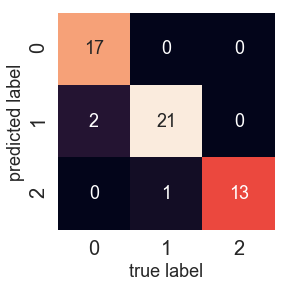

In [37]:
mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 2-4畫決策樹

In [38]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

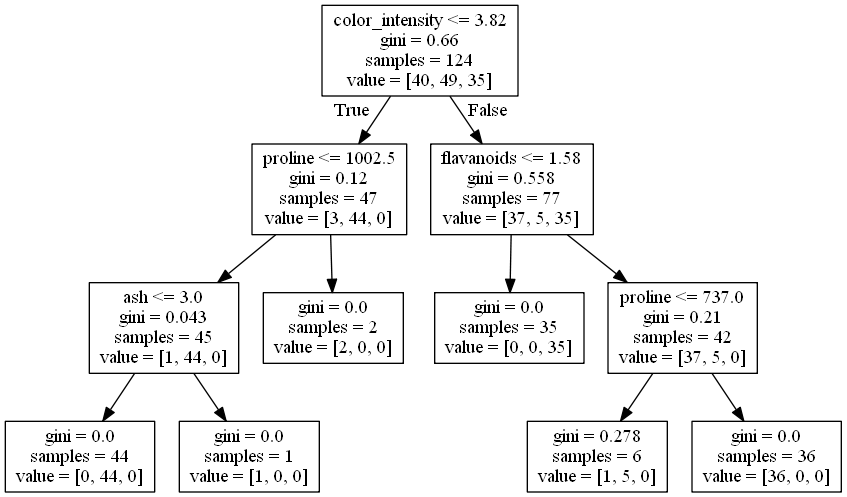

In [39]:
dot_data=export_graphviz(tree, out_file=None,feature_names=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'])
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_pdf('dot_data.pdf')
Image(graph.create_png())


# 隨機森林實作

# sklearn.ensemble.RandomForestClassifier參數
* [知乎-隨機森林算法參數解釋及調優 建置步驟 最佳化參數code範例](https://zhuanlan.zhihu.com/p/56940098)
* [sklearn.ensemble.RandomForestClassifier原文參數](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

### RF框架參數意義
#### n_estimators:
對原始數據集進行有放回抽樣生成的子數據集個數，即決策樹的個數。若n_estimators太小容易欠擬合，太大不能顯著的提升模型，所以n_estimators選擇適中的數值，版本0.20的默認值是10,版本0.22的默認值是100。

#### bootstrap:
是否對樣本集進行有放回抽樣來構建樹，True表示是,默認值True。

#### oob_score
是否採用袋外樣本來評估模型的好壞，True代表是，默認值False,袋外樣本誤差是測試數據集誤差的無偏估計，所以推薦設置True。
### RF決策樹參數含義:
###### max_features:
構建決策樹最優模型時考慮的最大特徵數。默認是"auto"，表示最大特徵數是N的平方根;“log2"表示最大特徵數是[公式];"sqrt"表示最大特徵數是[公式]。如果是整數，代表考慮的最大特徵數；如果是浮點數，表示對(N * max_features)取整。其中N表示樣本的特徵數。

######  max_depth:
決策樹最大深度。若等於None,表示決策樹在構建最優模型的時候不會限制子樹的深度。如果模型樣本量多，特徵也多的情況下，推薦限制最大深度；若樣本量少或者特徵少，則不限制最大深度。

######  min_samples_leaf:
葉子節點含有的最少樣本。若葉子節點樣本數小於min_samples_leaf，則對該葉子節點和兄弟葉子節點進行剪枝，只留下該葉子節點的父節點。整數型表示個數，浮點型表示取大於等於（樣本數* min_samples_leaf)的最小整數。min_samples_leaf默認值是1。

###### min_samples_split:
節點可分的最小樣本數，默認值是2，如果低於這個樣本數，決策樹不做劃分。整數型和浮點型的含義與min_samples_leaf類似。

###### max_leaf_nodes:
最大葉子節點數。int設置節點數,None表示對葉子節點數沒有限制。

###### min_impurity_decrease:
節點劃分的最小不純度。假設不純度用信息增益表示，若某節點劃分時的信息增益大於等於min_impurity_decrease，那麼該節點還可以再劃分；反之，則不能劃分。

###### criterion:
表示節點的劃分標準。不純度標準參考Gini指數，信息增益標準參考"entrop"熵。

###### min_samples_leaf:
葉子節點最小的樣本權重和。葉子節點如果小於這個值，則會和兄弟節點一起被剪枝，只保留葉子節點的父節點。默認是0，則不考慮樣本權重問題。一般來說，如果有較多樣

# 3-1-1 訓練簡易模組建置決策森林

In [40]:
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要使用多少CART樹（CART樹為使用GINI算法的決策樹）
rfc = RandomForestClassifier(n_estimators=100,oob_score=True)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)

c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


# 3-1-2 觀察簡易模組跑分/混淆矩陣
* [隨機森林算法OOB_SCORE最佳特徵選擇](https://blog.csdn.net/zehui6202/article/details/79625639)
![混淆矩陣](混淆矩陣.jpg)
### 準確率(accuracy) :
其定義是:對於給定的測試數據集，分類器正確分類的樣本數與總樣本數之比
A c c = Np r e/ Nt o t a l   
Np r e:預測對的樣本數=TP+ TN	    
Nt o t a l:測試集總的樣本數:TP+ TN+ FP+ FN
### 召回率(Recall): 
針對資料集中的所有正例(TP+FN)而言,模型正確判斷出的正例(TP)佔資料集中所有正例的比例.   
TP/TP+FN   
FN表示被模型誤認為是負例但實際是正例的資料.召回率也叫查全率,以物體檢測為例,我們往往把圖片中的物體作為正例,此時召回率高代表著模型可以找出圖片中更多的物體
### 精確率(Precision):
在預測結果為正類的數據(TP+FN)中，有多少數據被正確預測(原本就是正類(TP))  
TP/TP+FP
### F1-Measure:
為精確率和召回率的調和平均值  
2TP/(2TP+FN+FP)=(2*(Precison*Recall))/(Precison+Recall)
## score函數所得結果為f1 score
## oob_score函數較為特別 不利用交叉比對而是通過袋外樣本，可以評估這個樹的準確度(accuracy)

In [41]:
print(rfc.score(x_test, y_test))
print(rfc.oob_score_)

0.9814814814814815
0.9596774193548387


In [42]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, rfc_pred, target_names=target_names))


              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        19
     class 1       1.00      0.95      0.98        22
     class 2       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



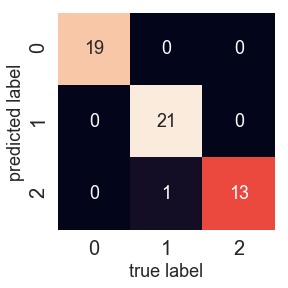

In [43]:
mat = confusion_matrix(y_test, rfc_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 3-2對外層的bagging框架進行參數擇優，即對n_estimators參數擇優
* sol1:暴力法,亂猜
* sol2:函數得最佳解

# 3-2-1 暴力法

In [44]:
rfc0 = RandomForestClassifier(n_estimators=10)
rfc0.fit(x_train,y_train)
rfc0_pred = rfc.predict(x_test)
print("when n_estimators=10: ",rfc0.score(x_train, y_train),"\n")
print("when n_estimators=10: ",rfc0.score(x_test, y_test),"\n")
rfc1 = RandomForestClassifier(n_estimators=100)
rfc1.fit(x_train,y_train)
rfc1_pred = rfc.predict(x_test)
print("when n_estimators=100: ",rfc1.score(x_test, y_test),"\n")
rfc2 = RandomForestClassifier(n_estimators=300)
rfc2.fit(x_train,y_train)
rfc2_pred = rfc.predict(x_test)
print("when n_estimators=300: ",rfc2.score(x_test, y_test),"\n")


c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


when n_estimators=10:  1.0 

when n_estimators=10:  0.9629629629629629 

when n_estimators=100:  0.9814814814814815 

when n_estimators=300:  0.9814814814814815 



# 3-2-2參數的最佳解(樹的數量)
[sklearn.model_selection.GridSearchCV原文網址](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [45]:
from sklearn.model_selection import GridSearchCV
param_test1 = {"n_estimators":range(1,101,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,cv=10)
gsearch1.fit(x_train,y_train)

print(gsearch1)
print(gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\pr

c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\pr

c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\pr

c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\pr

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(1, 101, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
{'n_estimators': 31}
best accuracy:0.983871


# 3-2-3 優化決策樹參數的最大特徵數max_features,其他參數設置為常數
當然也可以暴力解 但不另外做

In [46]:
param_test2 = {"max_features":range(1,11,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=31,
                        random_state=10),
                        param_grid = param_test2,cv=10)
gsearch1.fit(x_train,y_train)
print(gsearch1)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\pr

c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\pr

c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\pr

c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\pr

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': range(1, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)
{'max_features': 1}
best accuracy:0.983871


c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# 泛化相關資料
* [知乎-泛化誤差(generalisation error)，偏差(bias)，方差(variance)](https://zhuanlan.zhihu.com/p/334493630)
* [知乎-機器學習中的泛化能力](https://zhuanlan.zhihu.com/p/59673364)

# 3-2-4用最優參數重新訓練數據，計算泛化誤差以便得知其泛化能力

In [47]:
rf0 = RandomForestClassifier(n_estimators=41,max_features=1,
                             oob_score=True)
rf0.fit(x_train,y_train)
rf0_pred = rf0.predict(x_test)
print(rf0.oob_score_)
print("accuracy: %f" % rf0.oob_score_)

0.9838709677419355
accuracy: 0.983871


c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# 3-2-5 觀察結果跑分/混淆矩陣

In [48]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, rf0_pred, target_names=target_names))
print(rf0.score(x_test, y_test))
print(rf0.oob_score_)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        19
     class 1       1.00      1.00      1.00        22
     class 2       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

1.0
0.9838709677419355


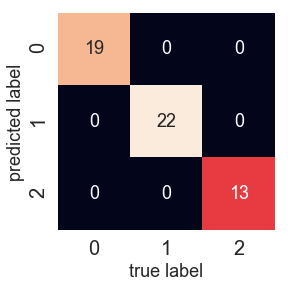

In [49]:
mat = confusion_matrix(y_test, rf0_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 使用心血管疾病資料做預測

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

sns.set_style("whitegrid") # 設置畫圖的風格
sns.set_context("paper") 
df = pd.read_csv("cardio_train.csv",';') #讀取CSV檔
df.drop(['id'],axis=1,inplace=True)

In [52]:
## dropna可去掉包含nan的行或列
df.dropna(
    axis=0,     # 0: 对列作; 1: 对行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    inplace=True)
df = df.reset_index(drop=True)#reset_index可以還原索引，重新變為默認的整型索引 ,drop為False則索引列會被還原為普通列，否則會丟失
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [53]:
X = df.drop(['cardio'],axis=1)
y = df['cardio']
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)#取總資料的80%做訓練集,20%做測試集

# 利用決策樹法求解心血管疾病預測

In [25]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
tree.score(x_test,y_test)

0.7294285714285714

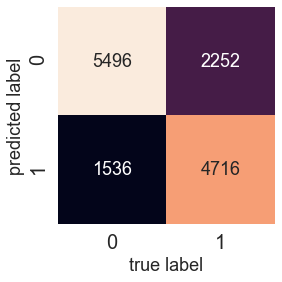

In [26]:
mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

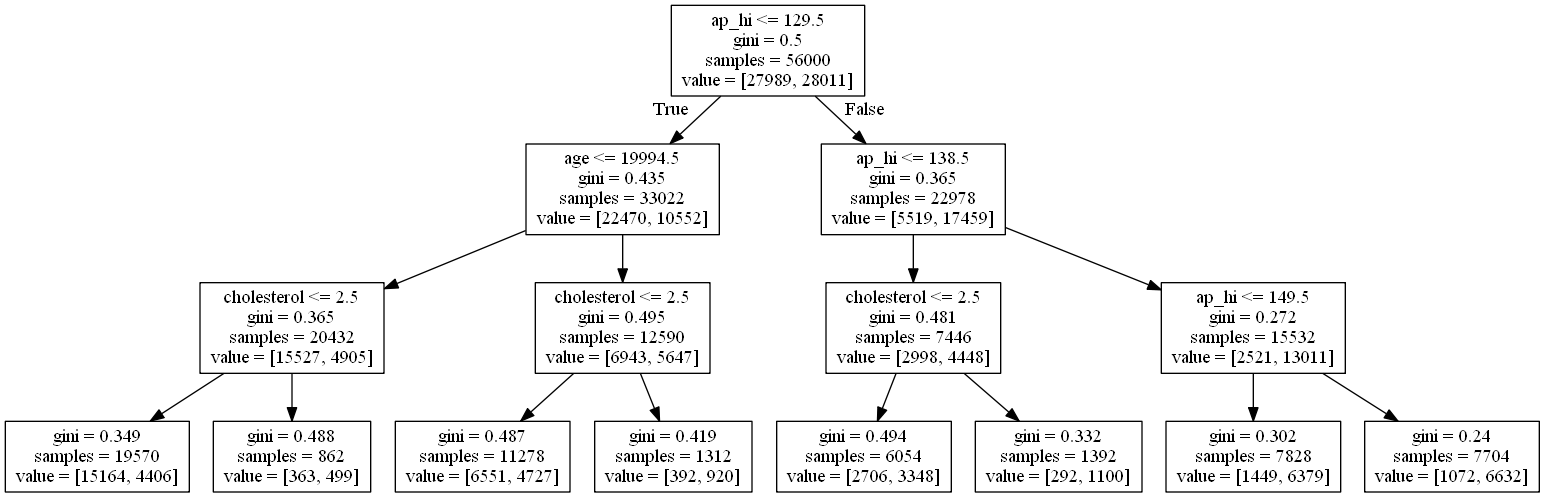

In [27]:
dot_data=export_graphviz(tree, out_file=None,feature_names=['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_pdf('dot_data.pdf')
Image(graph.create_png())

# 利用參數最佳化法求解心血管疾病預測

In [50]:
rfc = RandomForestClassifier(n_estimators=100,oob_score=True)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)

c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [41]:
from sklearn.metrics import classification_report
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rfc_pred, target_names=target_names))

              precision    recall  f1-score   support

         無疾病       0.71      0.73      0.72      7032
         有疾病       0.72      0.70      0.71      6968

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



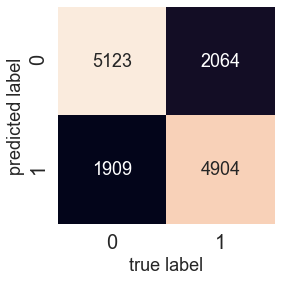

In [42]:
mat = confusion_matrix(y_test, rfc_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_test1 = {"n_estimators":range(1,101,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,cv=10)
gsearch1.fit(x_train,y_train)

print(gsearch1)
print(gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [33]:
param_test2 = {"max_features":range(1,11,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=81,
                        random_state=10),
                        param_grid = param_test2,cv=10)
gsearch1.fit(x_train,y_train)
print(gsearch1)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=81, n_jobs=None,
                                              oob_score=False, random_state=10,
                                  

In [31]:
param_test3 = {"max_depth":range(1,11,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=81,max_features=4,
                        random_state=10),
                        param_grid = param_test3,cv=10)
gsearch1.fit(x_train,y_train)
print(gsearch1)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)
{'max_depth': 10}
best accuracy:0.735143


In [54]:
rf0 = RandomForestClassifier(n_estimators=81,max_features=4,max_depth= 10,
                             oob_score=True)
rf0.fit(x_train,y_train)
rf0_pred = rf0.predict(x_test)
print(rf0.oob_score_)
print("accuracy: %f" % rf0.oob_score_)

0.7358392857142857
accuracy: 0.735839


In [55]:
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rf0_pred, target_names=target_names))
print(rf0.score(x_test, y_test))
print(rf0.oob_score_)
print(rf0.score(x_test, y_test))

              precision    recall  f1-score   support

         無疾病       0.72      0.79      0.75      7076
         有疾病       0.76      0.68      0.72      6924

   micro avg       0.74      0.74      0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

0.7376428571428572
0.7358392857142857
0.7376428571428572


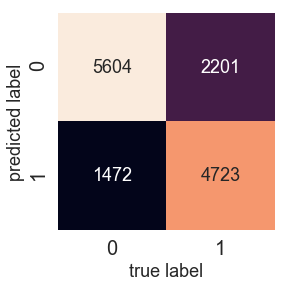

In [56]:
mat = confusion_matrix(y_test, rf0_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 利用暴力法求解心血管疾病預測

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
sns.set_style("whitegrid") # 設置畫圖的風格
sns.set_context("paper") 
df = pd.read_csv("cardio_train.csv",';') #讀取CSV檔
df.drop(['id'],axis=1,inplace=True)
df.dropna(
    axis=0,     # 0: 对列作; 1: 对行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    inplace=True)
df = df.reset_index(drop=True)#reset_index可以還原索引，重新變為默認的整型索引 ,drop為False則索引列會被還原為普通列，否則會丟失
X = df.drop(['cardio'],axis=1)
y = df['cardio']
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)#取總資料的80%做訓練集,20%做測試集

c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\jhfb0606\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


              precision    recall  f1-score   support

         無疾病       0.69      0.75      0.72      7041
         有疾病       0.72      0.65      0.69      6959

   micro avg       0.70      0.70      0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



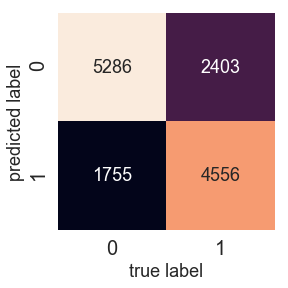

In [6]:
rfc = RandomForestClassifier(n_estimators=10,oob_score=True)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rfc_pred, target_names=target_names))
mat = confusion_matrix(y_test, rfc_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
rfc = RandomForestClassifier(n_estimators=100,oob_score=True)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rfc_pred, target_names=target_names))

              precision    recall  f1-score   support

         無疾病       0.71      0.73      0.72      7041
         有疾病       0.72      0.70      0.71      6959

   micro avg       0.72      0.72      0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [27]:
rfc = RandomForestClassifier(n_estimators=300,oob_score=True)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rfc_pred, target_names=target_names))

              precision    recall  f1-score   support

         無疾病       0.72      0.73      0.73      7041
         有疾病       0.72      0.71      0.72      6959

   micro avg       0.72      0.72      0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [28]:
rfc = RandomForestClassifier(n_estimators=500,oob_score=True)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rfc_pred, target_names=target_names))

              precision    recall  f1-score   support

         無疾病       0.72      0.73      0.73      7041
         有疾病       0.72      0.71      0.72      6959

   micro avg       0.72      0.72      0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [19]:
rfc = RandomForestClassifier(n_estimators=100,oob_score=True)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rfc_pred, target_names=target_names))
print(rfc.score(x_test, y_test))

              precision    recall  f1-score   support

         無疾病       0.72      0.74      0.73      7041
         有疾病       0.73      0.70      0.71      6959

   micro avg       0.72      0.72      0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

0.7202857142857143


In [20]:
rfc = RandomForestClassifier(n_estimators=100,oob_score=True, max_depth = 3)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rfc_pred, target_names=target_names))
print(rfc.score(x_test, y_test))

              precision    recall  f1-score   support

         無疾病       0.70      0.79      0.74      7041
         有疾病       0.75      0.66      0.70      6959

   micro avg       0.72      0.72      0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000

0.7224285714285714


In [21]:
rfc = RandomForestClassifier(n_estimators=100,oob_score=True, max_depth = 5)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rfc_pred, target_names=target_names))
print(rfc.score(x_test, y_test))

              precision    recall  f1-score   support

         無疾病       0.71      0.79      0.75      7041
         有疾病       0.76      0.67      0.71      6959

   micro avg       0.73      0.73      0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

0.7305714285714285


In [22]:
rfc = RandomForestClassifier(n_estimators=100,oob_score=True, max_depth = 10)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rfc_pred, target_names=target_names))
print(rfc.score(x_test, y_test))

              precision    recall  f1-score   support

         無疾病       0.72      0.78      0.75      7041
         有疾病       0.76      0.69      0.72      6959

   micro avg       0.74      0.74      0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

0.7367142857142858


In [23]:
rfc = RandomForestClassifier(n_estimators=100,oob_score=True, max_depth = 30)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rfc_pred, target_names=target_names))
print(rfc.score(x_test, y_test))

              precision    recall  f1-score   support

         無疾病       0.72      0.74      0.73      7041
         有疾病       0.73      0.70      0.71      6959

   micro avg       0.72      0.72      0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

0.7221428571428572


              precision    recall  f1-score   support

         無疾病       0.71      0.80      0.75      7041
         有疾病       0.76      0.67      0.71      6959

   micro avg       0.73      0.73      0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

0.7305


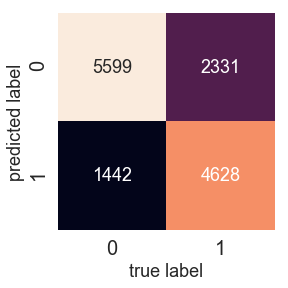

In [25]:
rfc = RandomForestClassifier(n_estimators=100,oob_score=True, max_depth = 5)

#從訓練組資料中建立隨機森林模型
rfc.fit(x_train,y_train)

#預測測試組的是否發生
rfc_pred = rfc.predict(x_test)
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rfc_pred, target_names=target_names))
print(rfc.score(x_test, y_test))
mat = confusion_matrix(y_test, rfc_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 最佳化code(僅放置程式碼)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid") # 設置畫圖的風格
sns.set_context("paper") 
df = pd.read_csv("cardio_train.csv",';') #讀取CSV檔
df.drop(['id'],axis=1,inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(['cardio'],axis=1)
y = df['cardio']
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)#取總資料的80%做訓練集,20%做測試集

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_test1 = {"n_estimators":range(1,101,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_test1,cv=10)
gsearch1.fit(x_train,y_train)
n=gsearch1.best_params_['n_estimators']
print(gsearch1)
print(gsearch1.best_params_)
print("best accuracy:%f" % gsearch1.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(1, 101, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
{'n_estimators': 91}
best accuracy:0.715857


In [12]:
param_test2 = {"max_features":range(1,11,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=n,
                        random_state=10),
                        param_grid = param_test2,cv=10)
gsearch1.fit(x_train,y_train)
mf=gsearch1.best_params_['max_features']
print(gsearch1)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=91, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': range(1, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)
{'max_features': 4}
best accuracy:0.716500


In [14]:
param_test3 = {"max_depth":range(1,11,1)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=n,max_features=mf,
                        random_state=10),
                        param_grid = param_test3,cv=10)
gsearch1.fit(x_train,y_train)
md=gsearch1.best_params_['max_depth']
print(gsearch1)
print(gsearch1.best_params_)
print('best accuracy:%f' % gsearch1.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=91, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)
{'max_depth': 9}
best accuracy:0.738250


In [57]:
rf0 = RandomForestClassifier(n_estimators=n,max_features=mf,max_depth= md,
                             oob_score=True)
rf0.fit(x_train,y_train)
rf0_pred = rf0.predict(x_test)
print(rf0.oob_score_)
print("accuracy: %f" % rf0.oob_score_)

0.735375
accuracy: 0.735375


In [58]:
target_names = ['無疾病', '有疾病']
print(classification_report(y_test, rf0_pred, target_names=target_names))
print(rf0.score(x_test, y_test))
print(rf0.oob_score_)
print(rf0.score(x_test, y_test))

              precision    recall  f1-score   support

         無疾病       0.72      0.79      0.75      7076
         有疾病       0.76      0.68      0.72      6924

   micro avg       0.74      0.74      0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

0.7363571428571428
0.735375
0.7363571428571428


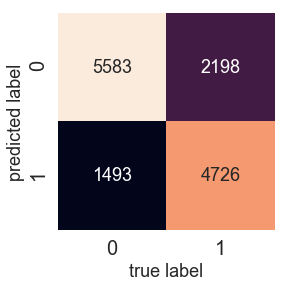

In [59]:
mat = confusion_matrix(y_test, rf0_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 亂數生成器(僅置放程式碼 非本節內容)

In [ ]:
# from sklearn.datasets import make_classification
# X,y = make_classification(n_samples=1000,n_features=50,n_clusters_per_class=3,n_classes=3,
#                           n_informative=15,random_state=42)
# print(X.shape)
# print(y.shape)

In [ ]:
# y

In [ ]:
# X